#**Predicting Heart Disease Using Machine Learning**

This notebook looks into using various Python-based libraries in an attempt to build a machine learning model capable of predicting whether of not someone has heart disease based on specific medical attributes.

**We are going to take the following approach**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## **1. Problem Definition:** 
Given clinical parameters about a patient, can we predict whether of not a patient has heart disease.

## **2. Data**
The original data comes from the Cleveland UCI Machine Learning Repository. 
https://archive.ics.uci.edu/ml/datasets/heart+disease

Verison also available on Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci


## **3. Evaluation**
> If we can reach 95% accuacy at predicting whether of not a patient has heart disease during the proof of concept, well pursue the project

## **4. Features**

**Create a data dictionary**
* age
* sex(1 = male, 0 = female)
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise 
* relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable *defect

## **Preparing the tools**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import plot_roc_curve

##**Load the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

path = "/content/Drive/My Drive/Colab_Notebooks/Personal/Udemy-Machine-Learning/heart-disease.csv"

df = pd.read_csv(path)
print(df.head())
print(df.shape)

Mounted at /content/Drive
   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]
(303, 14)


##**Exploratory Data Analysis**

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
1    165
0    138
Name: target, dtype: int64


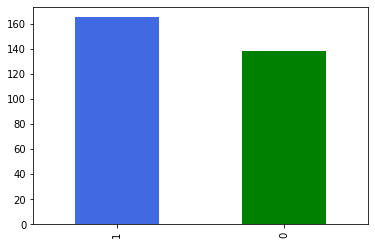

In [ ]:
print(df.isna().sum())
# How many of each class there are: heart disease or not.
print(df.target.value_counts())
df["target"].value_counts().plot(kind = "bar", color = ["royalblue", "green"]);

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### **Heart Disease Frequency by Sex**

1    207
0     96
Name: sex, dtype: int64
sex      0    1
target         
0       24  114
1       72   93


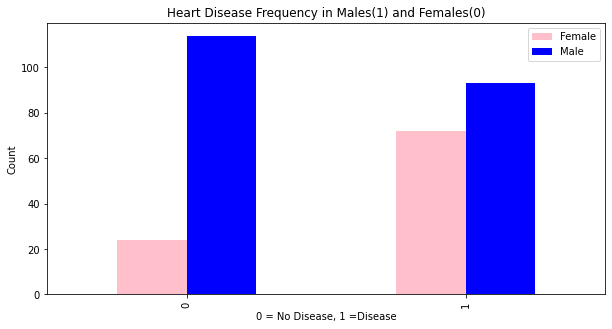

In [ ]:
print(df.sex.value_counts())

# Compare Target column and Sex column

print(pd.crosstab(df.target, df.sex))

pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10,5), color = ["pink", "blue"])
plt.title("Heart Disease Frequency in Males(1) and Females(0)")
plt.xlabel("0 = No Disease, 1 =Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])

#### **Age vs. Max Heart Rate for Heart Disease**

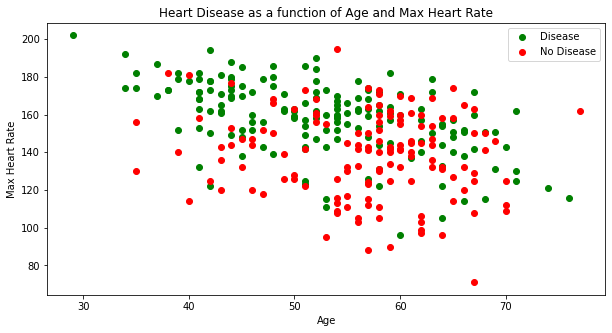

In [ ]:
# Creat another figure
plt.figure(figsize=(10,5))

# Scatter with positive Examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "green");

# Scatter with negative Examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "red");

# Add some info to the plot

plt.title("Heart Disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

#### **Heart Disease by Chest Pain Type**
* 0: Typical Angina
* 1: Atypical Angina
* 2: Non-Anginal Pain
* 3: Asymptomatic

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


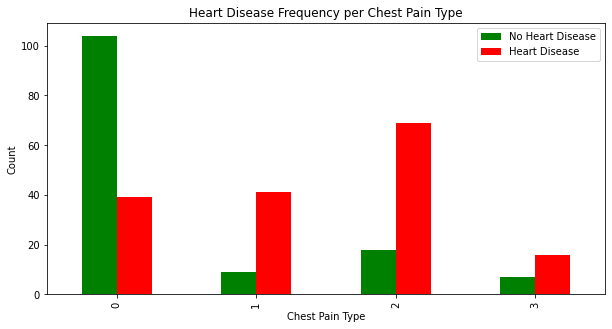

In [ ]:
print(pd.crosstab(df.cp, df.target))
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (10,5), color = ["green", "red"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])

#### **Correlation Matrix**

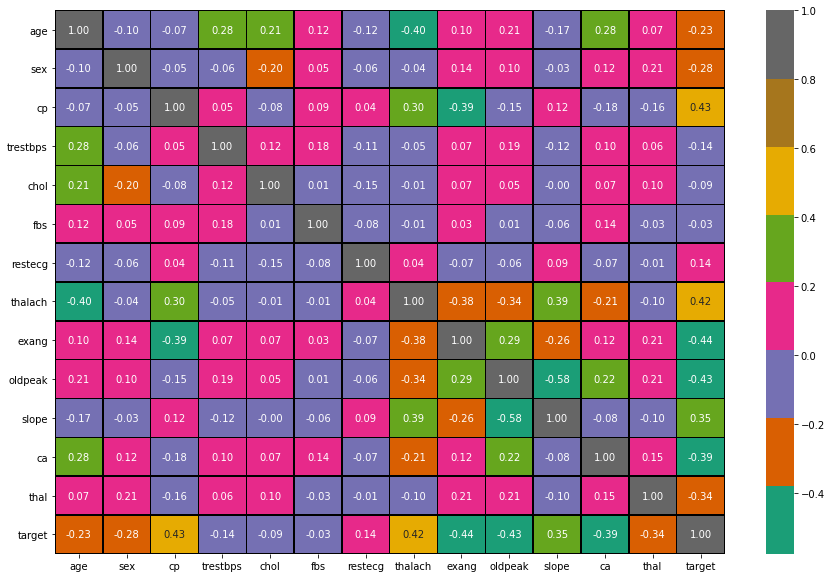

In [ ]:
df.corr()
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 linecolor = "black",
                 fmt = ".2f",
                 cmap = "Dark2")

## **5. Modelling**

In [ ]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
# Split the data into X and y
X = df.drop("target", axis = 1)
y = df["target"]

# Split the data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

We are going to use 3 different machine learning models:

1. `Logistic Regression`
2. `K-Nearest Neighbors Classifier`
3. `Random Forest Classifier`

In [ ]:
# To prevent repetivie modelling - Create a model dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RandomForest": RandomForestClassifier()}

# Create a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.639344262295082,
 'Logistic Regression': 0.8032786885245902,
 'RandomForest': 0.8524590163934426}

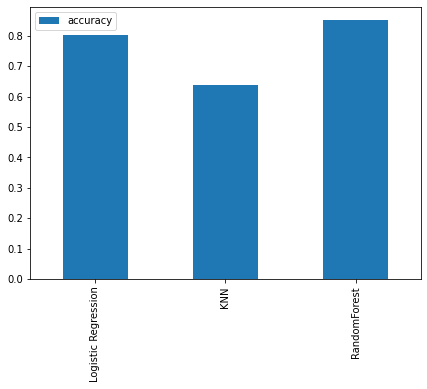

In [ ]:
# model comparison

model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar(figsize = (7,5));

Maximum KNN Score on the test data: 68.85%


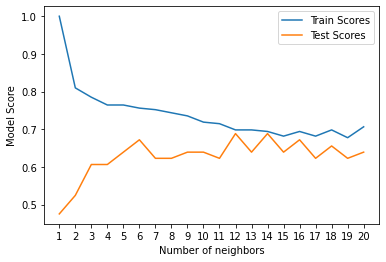

In [ ]:
# Hyperparameter tuning

## Tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

# Loop through the different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors = i)

  # fit the algorithm
  knn.fit(X_train, y_train)

  # Update the training scores list
  train_scores.append(knn.score(X_train, y_train))

  # Update the test scores list
  test_scores.append(knn.score(X_test, y_test))

plt.plot(neighbors, train_scores, label = "Train Scores")
plt.plot(neighbors, test_scores, label = "Test Scores")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.xticks(np.arange(1,21,1))
print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

In [ ]:
## Hyperparameter tuning using RandomizedSearchCV

### LogisticRegression() tuning

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]
                }

np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit the hyperparameter search model for LogisicRegression
rs_log_reg.fit(X_train, y_train)
print(rs_log_reg.score(X_test, y_test))


# Create a hyperparameter grip for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit the hyperparameter search model for RandomForestClassifier
rs_rf .fit(X_train, y_train)
print(rs_rf.score(X_test, y_test))


# Find the best Parameters for both the models

print(f"Logistic Regression Best Paras: {rs_log_reg.best_params_}")
print(f"Random Forest Best Paras: {rs_rf.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.819672131147541
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


0.8524590163934426
Logistic Regression Best Paras: {'solver': 'liblinear', 'C': 0.23357214690901212}
Random Forest Best Paras: {'n_estimators': 610, 'min_samples_split': 4, 'min_samples_leaf': 15, 'max_depth': 3}


In [ ]:
## Hyperparameter tuning using GridSearchCV

### Logistic Regression Tuning

# Different Hyperparameters for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}

# Grid hyperparameter search
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5, 
                          verbose = True)

# Fit the hyperparameter search model for Logistic Regression
gs_log_reg.fit(X_train, y_train)
print(gs_log_reg.score(X_test, y_test))



Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.819672131147541


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


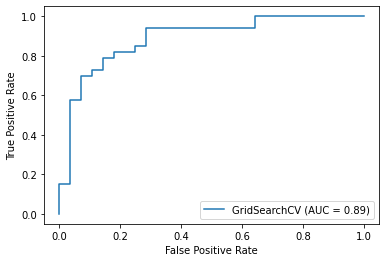

In [ ]:
# Evaluating the tuned machine learning classifier

y_preds = gs_log_reg.predict(X_test)

# Plot ROC cure and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

[[20  8]
 [ 3 30]]


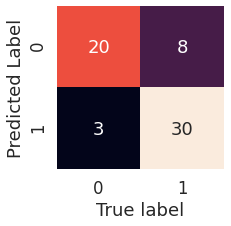

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize = (3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot = True,
                   cbar = False)
  plt.xlabel("True label")
  plt.ylabel("Predicted Label")
plot_conf_mat(y_test, y_preds)

In [ ]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



{'C': 0.20433597178569418, 'solver': 'liblinear'}
0.834808743169399
0.8182683982683983
0.9030303030303031
0.8572876223964057


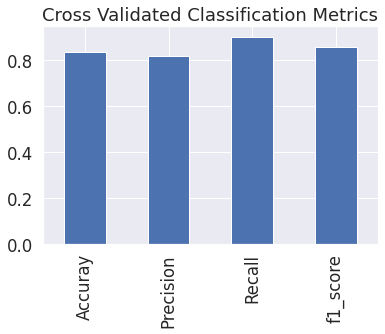

In [ ]:
# Calculate Evaluation Metrics using cross validation score

## Check for best hyperparameters
print(gs_log_reg.best_params_)

# Create a new classifier with best parameters 
clf = LogisticRegression(C = 0.1082636733874054, solver = 'liblinear')

# Cross Validated Accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring="accuracy")
print(np.mean(cv_acc))

# Cross Validated Precision
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring="precision")
print(np.mean(cv_precision))

# Cross validated Recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring="recall")
print(np.mean(cv_recall))

# Cross Validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring="f1")
print(np.mean(cv_f1))


# Visualize the cross validated metrics

cv_metrics = pd.DataFrame({"Accuray": (np.mean(cv_acc)),
                           "Precision": (np.mean(cv_precision)),
                           "Recall": (np.mean(cv_recall)),
                           "f1_score": (np.mean(cv_f1))},
                          index = [0])

cv_metrics.T.plot.bar(title = "Cross Validated Classification Metrics", legend = False);

### **6. Feature Importance**

0.819672131147541
[[-1.96063905e-03 -5.93207075e-01  6.54310665e-01 -1.72869592e-02
   3.65197055e-05  3.95277070e-02  2.35970967e-01  2.84058255e-02
  -4.88997933e-01 -4.72561285e-01  2.06885553e-01 -4.74183837e-01
  -5.93755767e-01]]
{'age': -0.0019606390478419107, 'sex': -0.5932070745586603, 'cp': 0.6543106649609859, 'trestbps': -0.01728695919866398, 'chol': 3.651970553023708e-05, 'fbs': 0.039527706956660566, 'restecg': 0.23597096670537948, 'thalach': 0.02840582546927409, 'exang': -0.4889979334611207, 'oldpeak': -0.47256128549430826, 'slope': 0.20688555266266015, 'ca': -0.474183836554358, 'thal': -0.5937557672435141}


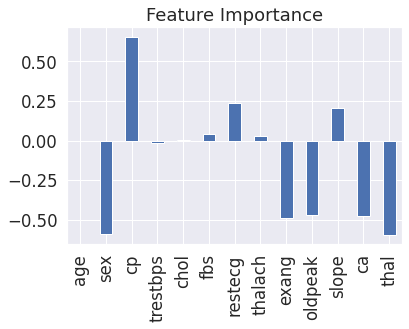

In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C = 0.1082636733874054, solver = 'liblinear')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
# Check coef_
print(clf.coef_)

# Match coef of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
print(feature_dict)

# Visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);